In [ ]:
# Многослойный перцептрон


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scaler

In [3]:
from sklearn.datasets import make_blobs

In [4]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

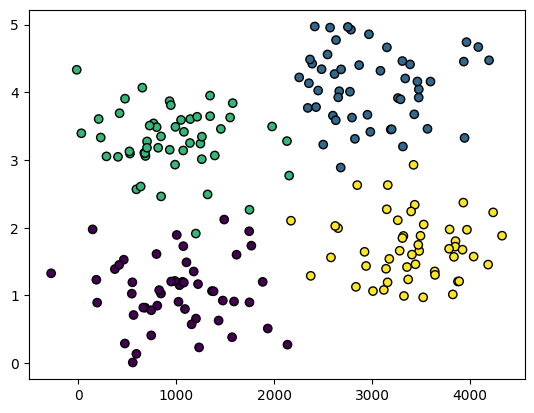

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [6]:
X

array([[ 2.13487731e+03,  2.72817163e-01],
       [ 3.63725818e+03,  1.35454246e+00],
       [ 1.03325861e+03,  1.15123595e+00],
       [ 2.38728224e+03,  4.42218149e+00],
       [ 2.59829517e+03,  3.65522511e+00],
       [ 1.47504421e+03,  9.24321396e-01],
       [ 1.46864905e+02,  1.97538770e+00],
       [ 3.31765323e+03,  1.87835193e+00],
       [ 3.51931528e+03,  9.71642449e-01],
       [ 1.76638961e+03,  1.73467938e+00],
       [ 1.34490908e+03,  3.95092311e+00],
       [ 2.92132237e+03,  1.64385387e+00],
       [ 9.32025150e+02,  3.86844568e+00],
       [ 2.61504196e+03,  4.26962460e+00],
       [ 2.15195835e+03,  2.76999209e+00],
       [ 2.65094709e+03,  1.99364024e+00],
       [ 4.64623689e+02,  1.52722586e+00],
       [ 3.17385320e+03,  1.53940534e+00],
       [ 2.95077374e+03,  3.66826086e+00],
       [ 4.03425470e+03,  1.57330710e+00],
       [ 1.04886248e+03,  3.59147684e+00],
       [ 3.47362598e+03,  3.92249495e+00],
       [ 3.93377948e+03,  4.45302233e+00],
       [ 8.

In [7]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

In [8]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [11]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i+1, j+1, weights, end=", ")
        print()
    print()

1 1 [-0.09809877 -0.58903611], 
1 2 [ 0.33667051 -0.31219238], 
1 3 [-0.82024119 -0.22424296], 
1 4 [-0.29720839  0.11423652], 
1 5 [-0.56852789 -0.18324369], 
1 6 [-0.66056109  0.37321781], 

2 1 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
2 2 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
2 3 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
2 4 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [12]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

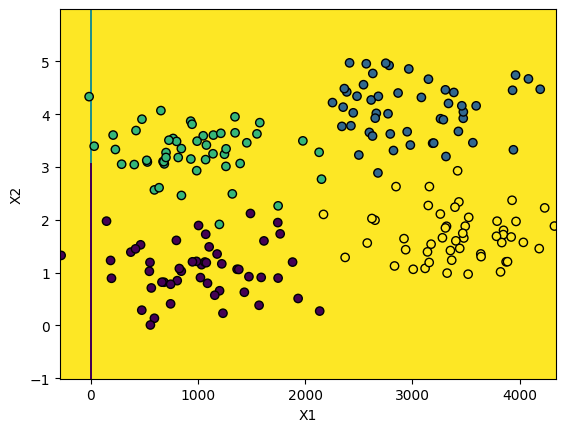

In [14]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler 

In [21]:
X_scaled = StandardScaler().fit_transform(X)

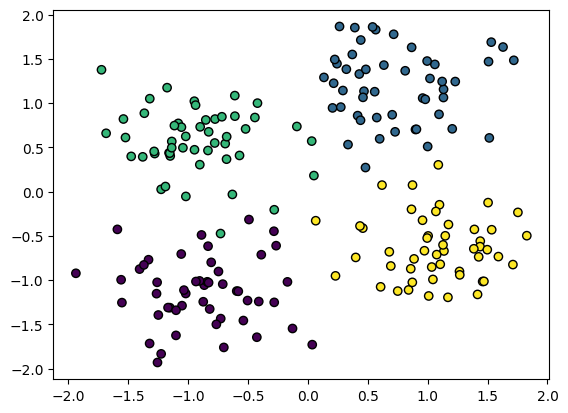

In [24]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)

In [28]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1,
                    max_iter=10000).fit(X_scaled, y)

In [29]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 49,  0,  1],
       [ 2,  3, 45,  0],
       [ 0,  1,  0, 49]])

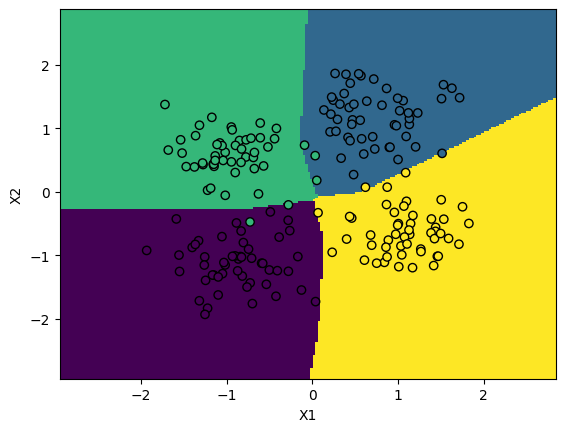

In [30]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [31]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6),
                    random_state=1,
                    max_iter=10000).fit(X_scaled, y)

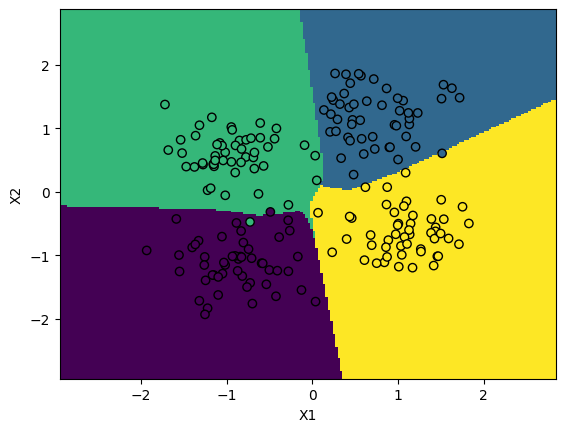

In [32]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [33]:
# Самостоятельное 1 Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [34]:
from sklearn.metrics import accuracy_score
import time

# Список количества нейронов в одном скрытом слое
neurons_list = [1, 2, 10, 100]
results_single_layer = []

print("Однослойный перцептрон с разным количеством нейронов:")
for n in neurons_list:
    # hidden_layer_sizes – кортеж с одним числом нейронов
    clf_single = MLPClassifier(hidden_layer_sizes=(n,), max_iter=10000, random_state=1)
    start = time.time()
    clf_single.fit(X_scaled, y) 
    elapsed = time.time() - start
    y_pred = clf_single.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    results_single_layer.append({"Neurons": n, "Time (sec)": elapsed, "Accuracy": acc})
    print(f"Нейронов: {n:>3} -> Accuracy = {acc:.4f}, Time = {elapsed:.4f} sec")
    
results_single_layer_df = pd.DataFrame(results_single_layer)
print("\nСводная таблица однослойных моделей:")
print(results_single_layer_df)

Однослойный перцептрон с разным количеством нейронов:
Нейронов:   1 -> Accuracy = 0.2500, Time = 0.0118 sec
Нейронов:   2 -> Accuracy = 0.9800, Time = 0.7385 sec
Нейронов:  10 -> Accuracy = 0.9800, Time = 0.2592 sec
Нейронов: 100 -> Accuracy = 0.9950, Time = 0.2470 sec

Сводная таблица однослойных моделей:
   Neurons  Time (sec)  Accuracy
0        1    0.011758     0.250
1        2    0.738512     0.980
2       10    0.259240     0.980
3      100    0.247025     0.995


In [35]:
# Самостоятельное 2 Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.
layers_list = [2, 3, 10]
results_multi_layer = []

print("\nМодели с разным количеством скрытых слоев (каждый слой по 6 нейронов):")
for n_layers in layers_list:
    hidden_structure = (6,) * n_layers
    clf_multi = MLPClassifier(hidden_layer_sizes=hidden_structure, max_iter=10000, random_state=1)
    start = time.time()
    clf_multi.fit(X_scaled, y)
    elapsed = time.time() - start
    y_pred = clf_multi.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    results_multi_layer.append({"Layers": n_layers, "Time (sec)": elapsed, "Accuracy": acc})
    print(f"Слоя: {n_layers:>2} -> Accuracy = {acc:.4f}, Time = {elapsed:.4f} sec")
    
results_multi_layer_df = pd.DataFrame(results_multi_layer)
print("\nСводная таблица моделей с разным количеством слоев:")
print(results_multi_layer_df)


Модели с разным количеством скрытых слоев (каждый слой по 6 нейронов):
Слоя:  2 -> Accuracy = 0.9900, Time = 1.3903 sec
Слоя:  3 -> Accuracy = 0.9850, Time = 0.4804 sec
Слоя: 10 -> Accuracy = 0.7500, Time = 0.4781 sec

Сводная таблица моделей с разным количеством слоев:
   Layers  Time (sec)  Accuracy
0       2    1.390326     0.990
1       3    0.480363     0.985
2      10    0.478108     0.750


In [36]:
# Самостоятельное 3 Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.
# Используем модель с большим количеством слоев
deep_clf = MLPClassifier(hidden_layer_sizes=(6,)*10, max_iter=10000, random_state=1)
deep_clf.fit(X_scaled, y)

print("\nДанные по глубокой модели (10 скрытых слоев по 6 нейронов):")
for layer_idx, (weights, bias) in enumerate(zip(deep_clf.coefs_, deep_clf.intercepts_), start=1):
    print(f"\nСлой {layer_idx}:")
    print("Веса (shape {}):\n{}".format(weights.shape, weights))
    print("Смещения (shape {}):\n{}".format(bias.shape, bias))


Данные по глубокой модели (10 скрытых слоев по 6 нейронов):

Слой 1:
Веса (shape (2, 6)):
[[-0.60626932  0.18062916 -0.69112334 -0.53681688 -0.75203401 -0.68505481]
 [-0.63505387 -0.57803899 -0.63933485 -0.13992729 -0.46889741  0.79686234]]
Смещения (shape (6,)):
[-0.29827085  0.58254576 -0.80558221  0.29390955 -0.2053024   0.34374588]

Слой 2:
Веса (shape (6, 6)):
[[-0.43294849 -0.01469277  0.07483603  0.87674608  0.10423674  0.63733661]
 [ 0.84886085  0.77591573 -0.22102108 -0.19782122 -0.26245014  0.63624154]
 [-0.71116396  0.27918988  0.21995841  0.37101016  0.688886    0.07472082]
 [-0.00464833  0.49878215 -0.24567133  0.73440923  0.81074278  0.16893574]
 [-0.51084986  0.74815649 -0.15769524  0.32840944  0.94305087 -0.00752235]
 [-0.80498954 -0.79615175 -0.24245089  0.27261586 -0.72746787 -0.73240075]]
Смещения (shape (6,)):
[-0.07533372 -0.38024246  0.08078346 -0.15208778  0.09718154  0.19408109]

Слой 3:
Веса (shape (6, 6)):
[[-6.98098269e-01 -2.79337092e-01 -1.06601442e-02 -2.

In [37]:
# Самостоятельное 4 Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.
# Создадим модель с большим количеством нейронов и слоев
print("\nМодель с большим количеством нейронов и слоев:")
start = time.time()
complex_clf = MLPClassifier(hidden_layer_sizes=(100,)*5, max_iter=10000, random_state=1)
complex_clf.fit(X_scaled, y)
elapsed_complex = time.time() - start
y_pred_complex = complex_clf.predict(X_scaled)
acc_complex = accuracy_score(y, y_pred_complex)
print(f"Complex Model -> Accuracy = {acc_complex:.4f}, Time = {elapsed_complex:.4f} sec")


Модель с большим количеством нейронов и слоев:
Complex Model -> Accuracy = 0.9900, Time = 0.6218 sec
